# Phase4 Project

## Business Objective

To help Acme Online analyze customer tweets from their Twitter page about Apple and Google products. The result of this analysis will be used to find out ways to increase customer satisfaction, why certain products are more successful than others, are there customers contemplating switching from Apple to Google or vice-versa etc.

## Methodology

We will be using a database that consists of approximately 9000 tweets about Apple and Google products purchased from Acme Online own store. NLP modelling method will be employed to analyze the tweet and classify it as 'positive', 'negative' or 'neutral'. The resulting classification should help us understand which company's product an services are successful and hopefully give us insight as to why as well.

# Analysis

In [1]:
# import libraries
import pandas as pd
import string
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords',quiet=True)
from nltk.corpus import stopwords

In [2]:
#import the csv file
df = pd.read_csv('tweets.csv',encoding = 'unicode_escape')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
# renaming columns for better readability
df.columns=['tweet_text','product_service','emotion']
df.head()

,tweet_text,product_service,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_text       9092 non-null   object
 1   product_service  3291 non-null   object
 2   emotion          9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


We can see that the `product_service` column is missing more than 50% of the data

In [5]:
# looking at the emotion column
df['emotion'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

We can see that we have a very unbalanced dataset. Let's explore the data further

In [6]:
#slicing the 'no emotion....' sentiment
df_no_emotion = df[df['emotion'] == 'No emotion toward brand or product']
df_no_emotion

,tweet_text,product_service,emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [7]:
df_no_emotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5389 entries, 5 to 9092
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_text       5388 non-null   object
 1   product_service  91 non-null     object
 2   emotion          5389 non-null   object
dtypes: object(3)
memory usage: 168.4+ KB


We can infer that there is no product or service listed against tweets that are as classified as 'No emotion towards brand or product'. Sine it does not add any value for our analysis, we can delete this class entirely.

In [8]:
#removing the 'no mention...' classifier from the df
df = df[df['emotion'] != 'No emotion toward brand or product']
df['emotion'].value_counts()

Positive emotion    2978
Negative emotion     570
I can't tell         156
Name: emotion, dtype: int64

In [9]:
#checking for null values
df.isna().sum()

tweet_text           0
product_service    504
emotion              0
dtype: int64

Looks like 'product_service' has 504 null values

In [10]:
#looking at the null values
df[df['product_service'].isnull()]

,tweet_text,product_service,emotion
46,Hand-Held Û÷HoboÛª: Drafthouse launches Û÷H...,NaN,Positive emotion
64,Again? RT @mention Line at the Apple store is ...,NaN,Negative emotion
68,Boooo! RT @mention Flipboard is developing an ...,NaN,Negative emotion
90,Thanks to @mention for publishing the news of ...,NaN,I can't tell
102,ÛÏ@mention &quot;Apple has opened a pop-up st...,NaN,I can't tell
...,...,...,...
9043,Hey is anyone doing #sxsw signing up for the g...,NaN,Negative emotion
9049,@mention you can buy my used iPad and I'll pic...,NaN,Positive emotion
9052,@mention You could buy a new iPad 2 tmrw at th...,NaN,Positive emotion
9054,"Guys, if you ever plan on attending #SXSW, you...",NaN,Positive emotion


This is similar to what we saw earlier. Although now we have emotional classifiers, it looks like the tweets are not referring to a product or service. Let's keep these tweets for our analysis. They could help better train the model.

We have now have a dataframe that we can use for modelling. We can begin pre-processing the data

## Preprocessing

In [11]:
# Removing capiltalization
df['tweet_text'] = df['tweet_text'].str.lower()

#removing punctuations
#use the default pattern in sklearn
basic_token_pattern = r"(?u)\b\w\w+\b"
tokenizer = RegexpTokenizer(basic_token_pattern)

#applying the tokenizer to the df
df['text_token'] = df['tweet_text'].apply(tokenizer.tokenize)
df.head(10)

,tweet_text,product_service,emotion,text_token
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,"[wesley83, have, 3g, iphone, after, hrs, tweet..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,"[jessedee, know, about, fludapp, awesome, ipad..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,"[swonderlin, can, not, wait, for, ipad, also, ..."
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[sxsw, hope, this, year, festival, isn, as, cr..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,"[sxtxstate, great, stuff, on, fri, sxsw, maris..."
7,"#sxsw is just starting, #ctia is around the co...",Android,Positive emotion,"[sxsw, is, just, starting, ctia, is, around, t..."
8,beautifully smart and simple idea rt @madebyma...,iPad or iPhone App,Positive emotion,"[beautifully, smart, and, simple, idea, rt, ma..."
9,counting down the days to #sxsw plus strong ca...,Apple,Positive emotion,"[counting, down, the, days, to, sxsw, plus, st..."
10,excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,"[excited, to, meet, the, samsungmobileus, at, ..."
11,find &amp; start impromptu parties at #sxsw wi...,Android App,Positive emotion,"[find, amp, start, impromptu, parties, at, sxs..."


In [12]:
#visualzing the freq distribution of all the words in the text_token column
from nltk import FreqDist

#since FreqDist can only work with a list of words, we need take all the words from the text_token column
# and export it into a list. We can do this using the 'explode' method

freq_dist = FreqDist(df['text_token'].explode())
freq_dist

FreqDist({'sxsw': 3891, 'mention': 2611, 'the': 1982, 'to': 1467, 'link': 1367, 'ipad': 1264, 'at': 1217, 'rt': 1109, 'apple': 1093, 'for': 1070, ...})

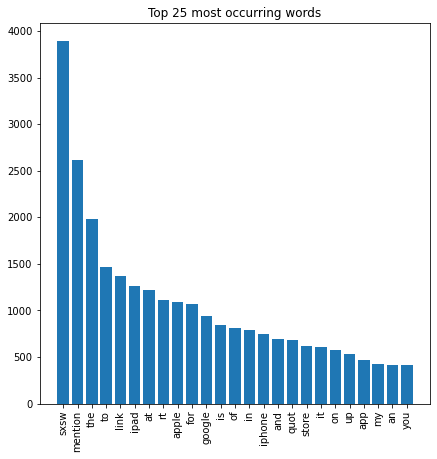

In [13]:
# listing out the top 25 most occuring words and ther respective counts
top_25 = list(zip(*freq_dist.most_common(25)))

#creating a plot of the top_25 words
fig,ax=plt.subplots(figsize=(7,7))
ax.bar(top_25[0],top_25[1])
ax.set_title('Top 25 most occurring words')
ax.tick_params(axis='x', rotation=90)

From the graph, we can see that words like (at,for,is,to) etc. occur quite frequently. Since these 'stopwords' add no semantic value to the text we can filter them out from the data.

In [18]:
#removing stopwords
#importing the default list of stopwords for the englosh language
stopwords_list = stopwords.words('english')

#creating a function to remove stopwords
def remove_stopwords(text_token):
    
    tokens_without_stopwords = [token for token in text_token if token not in stopwords_list]
    return tokens_without_stopwords

In [33]:
#applying the function to the text_token column in the df
df['tokens_without_stopwords'] = df['text_token'].apply(remove_stopwords)

df.head()

,tweet_text,product_service,emotion,text_token,tokens_without_stopwords
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,"[wesley83, have, 3g, iphone, after, hrs, tweet...","[wesley83, 3g, iphone, hrs, tweeting, rise_aus..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipad, iphon..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,"[swonderlin, can, not, wait, for, ipad, also, ...","[swonderlin, wait, ipad, also, sale, sxsw]"
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[sxsw, hope, this, year, festival, isn, as, cr...","[sxsw, hope, year, festival, crashy, year, iph..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


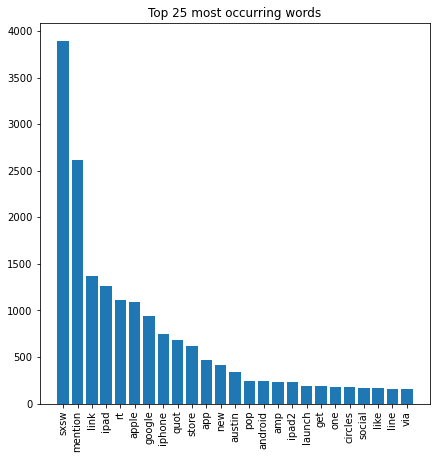

In [37]:
freq_dist = FreqDist(df['tokens_without_stopwords'].explode())

# listing out the top 25 most occuring words and ther respective counts
top_25 = list(zip(*freq_dist.most_common(25)))

#creating a plot of the top_25 words
fig,ax=plt.subplots(figsize=(7,7))
ax.bar(top_25[0],top_25[1])
ax.set_title('Top 25 most occurring words')
ax.tick_params(axis='x', rotation=90)